## Анализ датафрейма о супермаркетах
### провел исследование: Киселев Илья

Количество супермаркетов в большинстве густонаселенных городов растет, и конкуренция на рынке также высока. Набор данных представляет собой данные о продажах компании-супермаркета, которые были зарегистрированы в 3 разных филиалах за 3 месяца. Проанализируем этот датафрейм: создадим наглядные графики. \
Ссылка на датафрейм: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

Подключим нужные нам библиотеки для работы с дата-фреймом.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

[supermarket_sales - Sheet1.csv] - исходный дата-фрейм. \
Прочитаем исходный дата-фрейм.

In [2]:
sales = pd.read_csv('supermarket_sales - Sheet1.csv' ,encoding='windows-1251',sep=',')

Давайте посмотрим основную информацию о фрейме данных, включая тип столбцов, ненулевые значения и использования памяти.

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

#### Предобработка данных

После просмотра информации о датафрейме можно увидеть, что колонка 'Date' и 'Time' имеют тип 'object', поменяем этот тип на нужный нам.

In [4]:
sales['date'] = pd.to_datetime(sales['Date'])
sales.pop('Date')
sales['date'].dtype
type(sales['date'])
pd.core.series.Series
sales['date'] = pd.to_datetime(sales['date'])
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year
sales['Time'] = pd.to_datetime(sales['Time'])
sales['Hour'] = (sales['Time']).dt.hour    

In [5]:
def replace_space_(name):
    new_name = name.lower().replace(' ', '_')
    return new_name

sales = sales.rename(columns=replace_space_)
sales = sales.rename(columns={'tax_5%':'tax_5'})
sales.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,total,...,payment,cogs,gross_margin_percentage,gross_income,rating,date,day,month,year,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10


Узнаем количество строк и число колонок в датафрейме.

In [6]:
sales.shape

(1000, 21)

Давайте воспользуемся методом describe  для вывода описания числовых колонок в датафрэйме. Выводит информацию о числе строк, среднем значении, стандартном отклонении, минимуме, максимуме и значениях по 25-му, 50-му и 75-му квартилям. 

In [7]:
sales.describe()

,unit_price,quantity,tax_5,total,cogs,gross_margin_percentage,gross_income,rating,day,month,year,hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


### Анализ 

Сгруппируем данные по городам и посчитаем среднюю цену чека.

In [8]:
sales_mean_total_city = sales.groupby('city', as_index=False) \
                             .agg({'total':'mean'}) \
                             .round(2)  \
                             .rename(columns={'total':'mean_total'})
sales_mean_total_city

,city,mean_total
0,Mandalay,319.87
1,Naypyitaw,337.10
2,Yangon,312.35


Чтобы показать разницу более наглядно, визуализируем показатель mean_total.

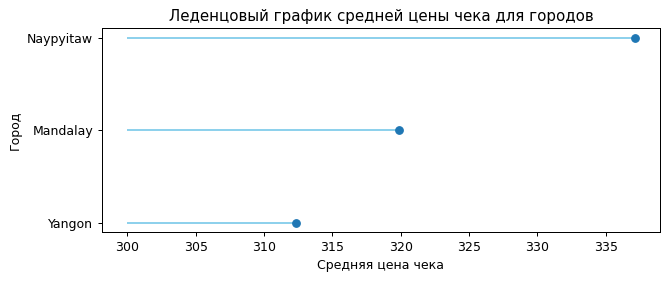

In [9]:
figure(figsize=(8, 3), dpi=90)
ordered_sales_mean_total_city = sales_mean_total_city.sort_values(by = 'mean_total')
my_range = range(1,len(sales_mean_total_city.index)+1)
 
plt.hlines(y = my_range, xmin = 300, xmax = ordered_sales_mean_total_city['mean_total'], color = 'skyblue')
plt.plot(ordered_sales_mean_total_city['mean_total'], my_range, "o")

plt.yticks(my_range, ordered_sales_mean_total_city['city'])
plt.title("Леденцовый график средней цены чека для городов", loc = 'center')
plt.xlabel('Средняя цена чека')
plt.ylabel('Город')

plt.show()

Посмотрим общее количество покупок по различным месяцам.

In [10]:
sales.query('year == 2019') \
  .month \
  .value_counts() 

1    352
3    345
2    303
Name: month, dtype: int64

Сгруппируем данные по месяцам, а затем по дням для того, чтобы выяснить 5 дат, когда больше всего было совершено покупок.

In [11]:
sales_days = sales.query('year ==2019') \
             .groupby('month') \
             .day \
             .value_counts() \
             .nlargest(5)
sales_days

month  day
2      7      20
       15     19
1      8      18
3      2      18
       14     18
Name: day, dtype: int64

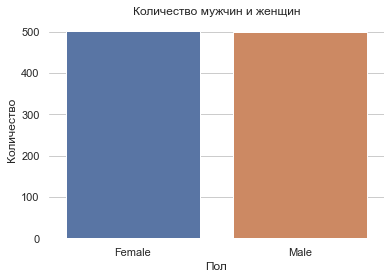

In [12]:
sns.set(style="whitegrid")      
gender_count  = sns.countplot(x = "gender", data = sales).set_title("Количество мужчин и женщин")
plt.xlabel('Пол')
plt.ylabel('Количество')
sns.despine(left=True, bottom=True)

Из графика выше можно увидеть, что мужчин и женщин в качестве покупателей одинаковое количество.

Теперь создадим более сложную визуализацию: средний размер чека в различных магазинах по часам с учетом того, человек какого пола совершил покупку.

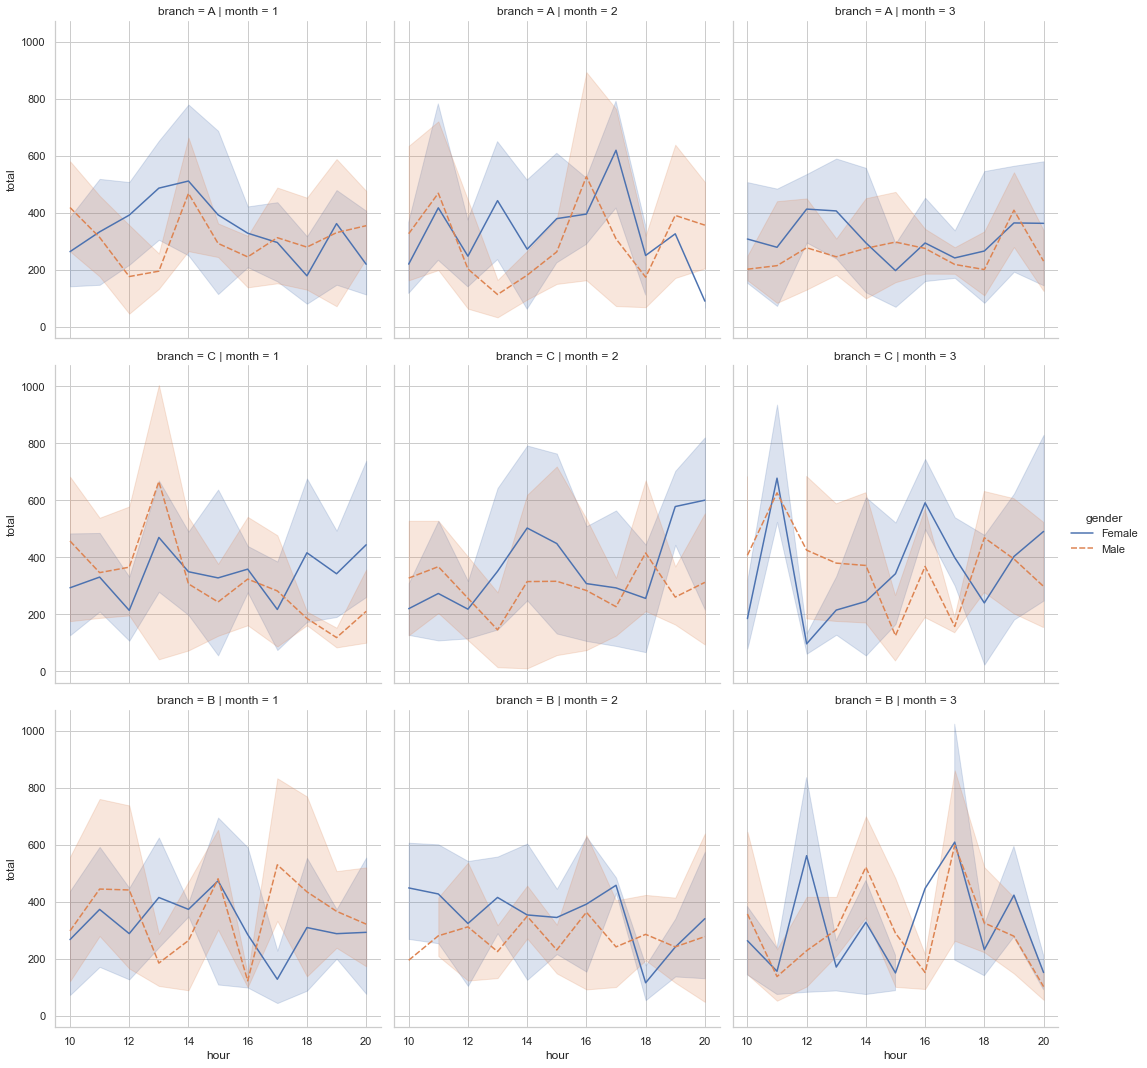

In [13]:
sns.relplot(x="hour", \
            y = 'total',\
            col = 'month' , \
            row = 'branch', \
            kind = "line", \
            hue = "gender", \
            style = "gender",\
            data =sales)

Text(0, 0.5, 'Количество проданных товаров')

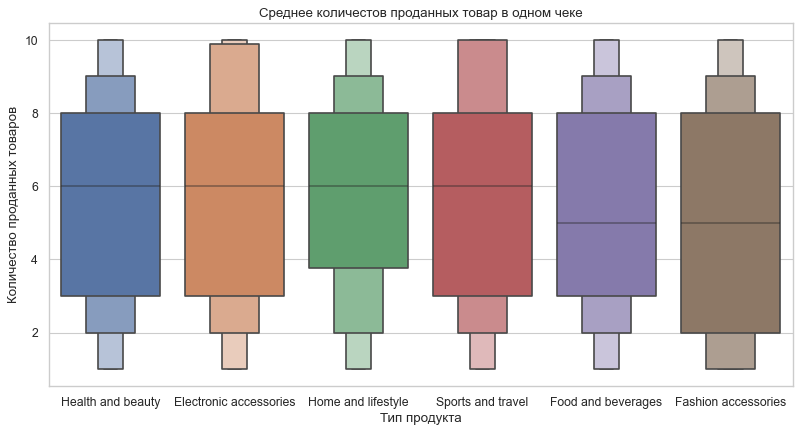

In [14]:
figure(figsize=(12, 6), dpi=80)
sns.boxenplot(x = 'product_line', y = 'quantity', data = sales )
plt.title("Среднее количестов проданных товар в одном чеке", loc = 'center')
plt.xlabel('Тип продукта')
plt.ylabel('Количество проданных товаров')

Из вышеперечисленного графика следует, что товары для красоты и здоровья, электронные аксессуары, товары для дома и образа жизни, товары для спорта и путешествий в среднем продаются лучше, чем продукты питания и напитки, а также модные аксессуары.

Text(0, 0.5, 'Тип продукта')

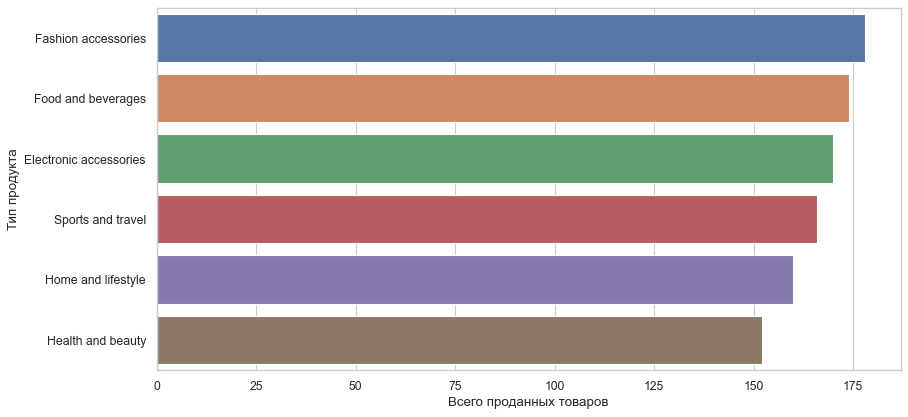

In [15]:
figure(figsize = (12, 6), dpi = 80)
sns.countplot(y = 'product_line', data = sales, order = sales['product_line'].value_counts().index )
plt.xlabel('Всего проданных товаров')
plt.ylabel('Тип продукта')

На приведенном выше графики показан общее количство товаров, продаваемых в данном датафрейме. 
Модные аксессуары стоят на самом высоком уровне, а здоровье и красота - на самом низком.

Text(0, 0.5, 'Тип продукта')

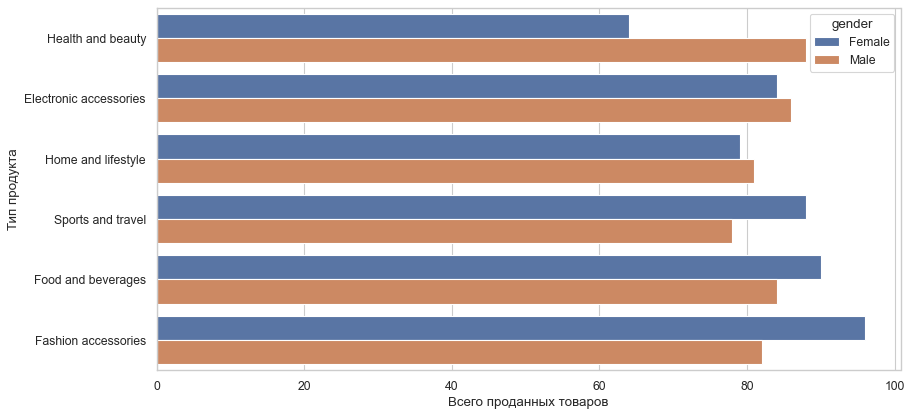

In [16]:
figure(figsize = (12, 6), dpi = 80)
sns.countplot(y ='product_line', hue = "gender", data = sales) 
plt.xlabel('Всего проданных товаров')
plt.ylabel('Тип продукта')

Теперь поговорим о способах оплаты покупок.

Text(0, 0.5, 'Количество')

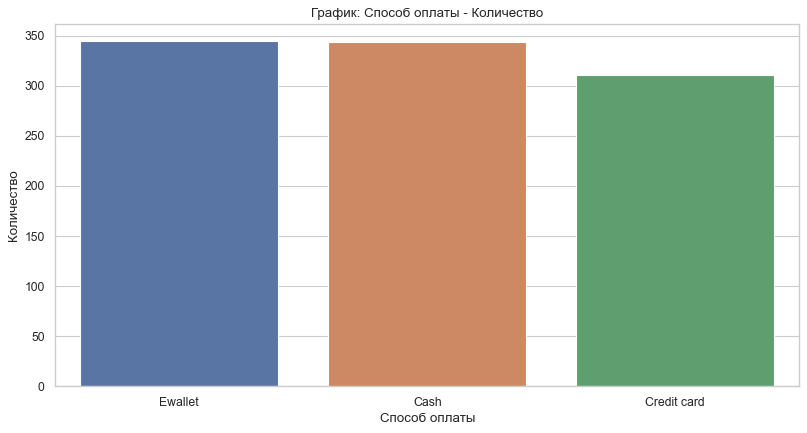

In [17]:
figure(figsize = (12, 6), dpi = 80)
sns.countplot(x = "payment", data = sales).set_title("График: Способ оплаты - Количество") 
plt.xlabel('Способ оплаты')
plt.ylabel('Количество')

Из графика выше видно, что большинство клиентов расплачиваются электронным кошелеком и наличными, в то время как менее 40 процентов из них расплачиваются кредитной картой. 

Text(0, 0.5, 'Количество')

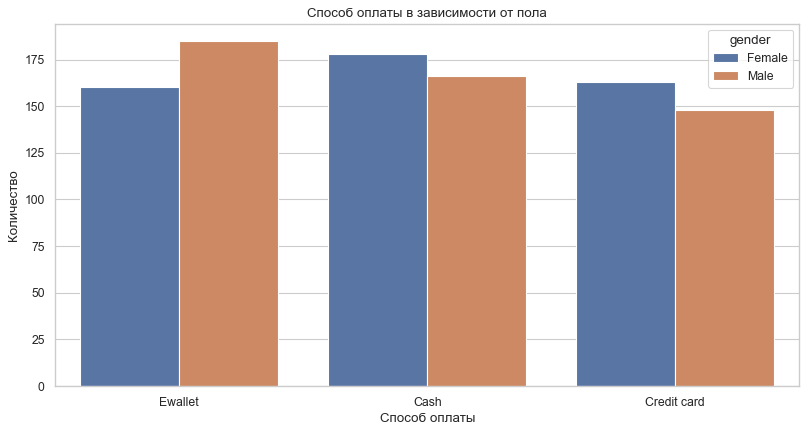

In [18]:
figure(figsize = (12, 6), dpi = 80)
sns.countplot(x = "payment", hue = "gender", data = sales).set_title("Способ оплаты в зависимости от пола") 
plt.xlabel('Способ оплаты')
plt.ylabel('Количество')

Из графика выше видно, что женщины в основном расплачиваются наличными и кредитными картами, в то время как мужчины электронным кошельком. Так как в датафрейме количество мужчин и женщин одинаково, то этот график отображает действительные данные о способах оплаты в зависимости от пола.

## Краткий аналитический обзор


- В нашей генеральной совокупности видно, что количество мужчин и женщин одинаково, из этого можно спокойной проводить исследование над двумя группами в зависимости от пола.
- Предпочтения девушек: модные аксессуары, спорт. Опираясь на гендерные стереотипы, можно однозначно сказать, что результат исследования совпадает с мнением социологов и маркетологов.
- Предпочтения мужчин: здоровье, электронные товары.
- Большинство мужчин предпочитать оплычивать покупки с помощью электронного кошелька. В принципе, электронный кошелек - самый популярный способ оплаты у покупателей, поэтому стоит улучшать сервис, связанный именно с этим способом оплаты.
